# Dados e Aprendizagem Automática
### Part IV

## **Linear Regression using USA Housing Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Load the CSV - USA Housing*

In [2]:
USAhousing = pd.read_csv("EcommerceCustomers.csv")

**Exploratory Data Analysis (EDA)**

In [3]:
USAhousing.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
USAhousing.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
USAhousing.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


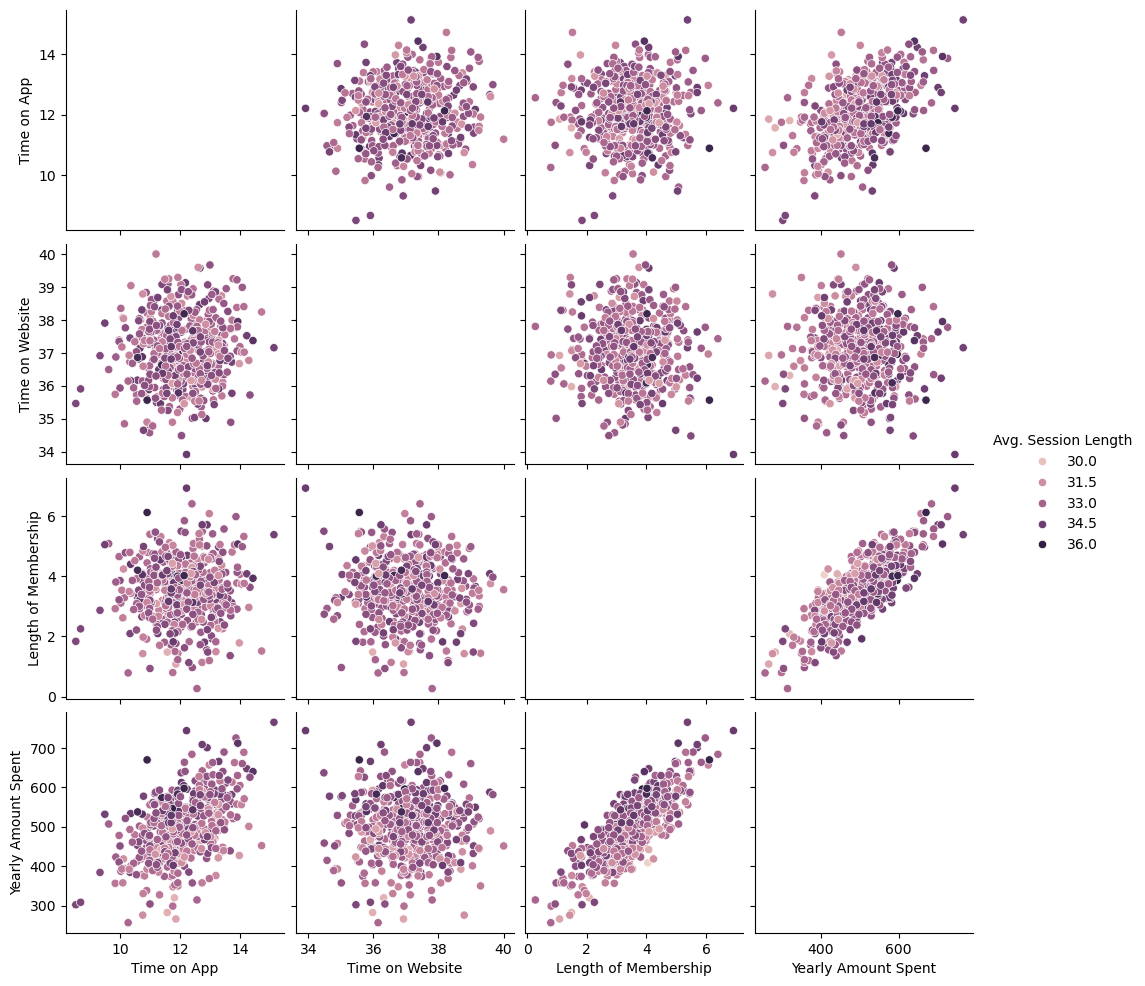

In [9]:
sns.pairplot(USAhousing, hue="Avg. Session Length")
plt.show()

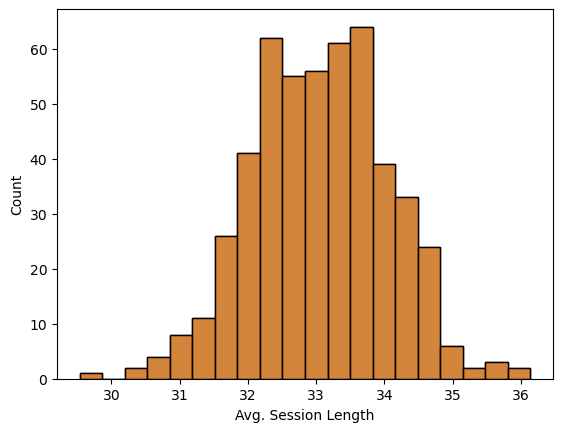

In [11]:
sns.histplot(USAhousing['Avg. Session Length'])
plt.show()

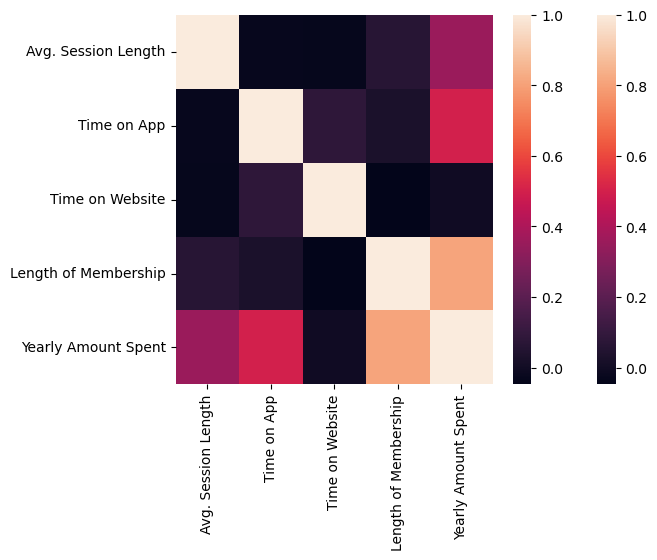

In [13]:
sns.heatmap(USAhousing.corr(numeric_only=True))
plt.show()

**Linear Regression Model**

In [14]:
 X = USAhousing[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
 y = USAhousing["Yearly Amount Spent"]

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=102)

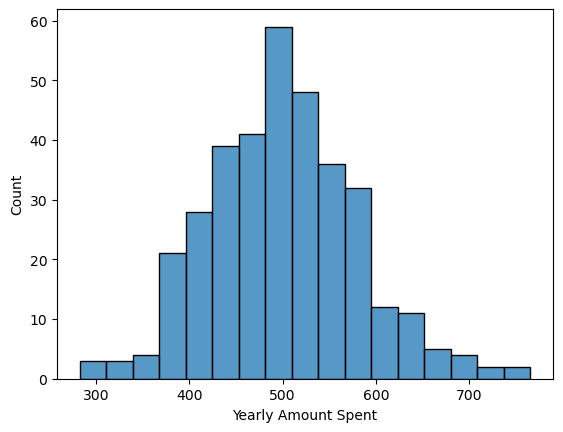

In [23]:
sns.histplot(y_train)
plt.show()

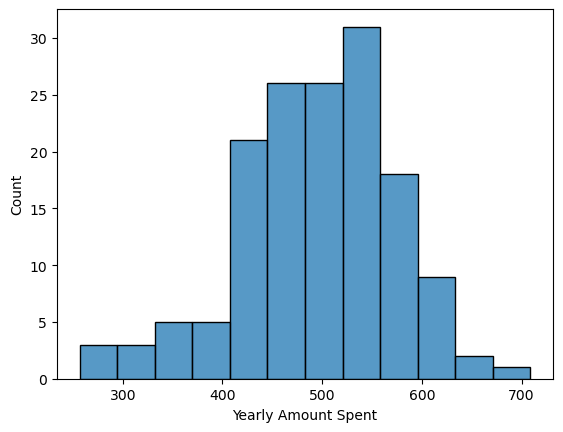

In [24]:
sns.histplot(y_test)
plt.show()

<code>sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)</code>

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

*Model Evaluation*

In [27]:
print(lm.intercept_)

-1056.5730826586794


In [28]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Session Length,25.478463
Time on App,38.649987
Time on Website,0.800880
Length of Membership,61.737674


*Predictions*

In [29]:
predictions = lm.predict(X_test)

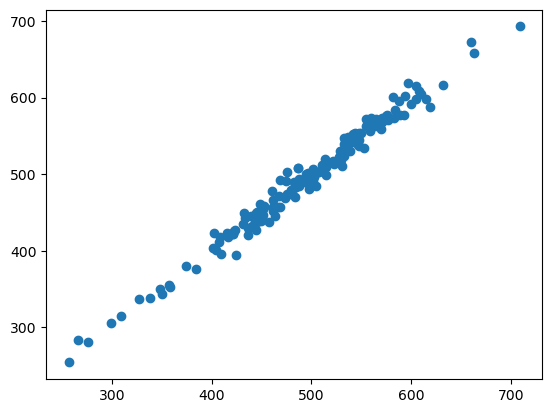

In [30]:
plt.scatter(y_test, predictions)
plt.show()

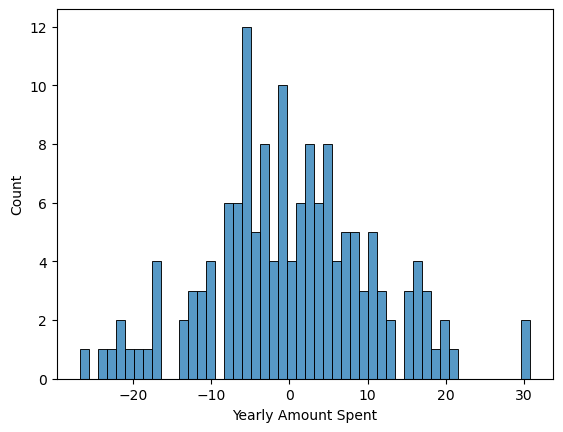

In [31]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

**Regression Evaluation Metrics**


The three common evaluation metrics for regression problems are:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand because it's the *average error*;
- **MSE** is more popular than MAE because MSE *"punishes" larger errors*, which tends to be useful in the real world;
- **RMSE** is even more popular than MSE because RMSE is interpretable in *units of the target variable*.

All of these are **loss functions** because we want to *minimize the error*.

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.2337611221798
MSE: 110.80450073382472
RMSE: 10.526371679445141
